In [1]:
import signac
import pandas as pd
import matplotlib
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

project = signac.get_project(root='../')
df_index = pd.DataFrame(project.index())
df_index = df_index.set_index(['_id'])
statepoints = {doc['_id']: doc['statepoint'] for doc in project.index()}
df = pd.DataFrame(statepoints).T.join(df_index)
df.head()

,L,NPROCS,T,data_dump_interval,job_type,output_type,simulation_time,trials,_status,analysis_time_s,analysis_time_s_sem,ete_workflow_time_s,overhead_time_s,read_frames_time,root,signac_id,simulation_time_s,statepoint
0154dd6f6f479013f84d0b68624b99fc,15,1,1,1,plumed_ds_sequential,dcd,200,1,{'a4md/0154dd6f/initialize/0000/913d9c3ed6402b...,223.540207,0.011596,273.335025,49.520253,NaN,/home/sthomas/projects/a4md/project/workspace,0154dd6f6f479013f84d0b68624b99fc,0.274565,"{'NPROCS': 1, 'T': 1, 'simulation_time': 200, ..."
5797d2afae39411be119ee5844f362a7,15,1,1,1,plumed_ds_concurrent,dcd,200,1,{'a4md/5797d2af/initialize/0000/37f99fb88167e8...,228.612009,0.048757,263.033435,34.177575,NaN,/home/sthomas/projects/a4md/project/workspace,5797d2afae39411be119ee5844f362a7,0.243850,"{'NPROCS': 1, 'T': 1, 'simulation_time': 200, ..."
7cad06293b7da146846957b0e1fc3352,15,1,1,1,plumed_sequential,dcd,200,1,{'a4md/7cad0629/initialize/0000/2e4d794419bd05...,213.487281,0.007536,220.777523,7.023571,NaN,/home/sthomas/projects/a4md/project/workspace,7cad06293b7da146846957b0e1fc3352,0.266671,"{'NPROCS': 1, 'T': 1, 'simulation_time': 200, ..."
1f1e53f6cb5c9932d234c807b81df947,15,1,1,10,plumed_sequential,dcd,200,1,{'a4md/1f1e53f6/initialize/0000/fbaa35243baaeb...,21.972164,0.008930,25.536503,3.357823,NaN,/home/sthomas/projects/a4md/project/workspace,1f1e53f6cb5c9932d234c807b81df947,0.206516,"{'NPROCS': 1, 'T': 1, 'simulation_time': 200, ..."
687f917b76b149f486720e7289d81250,15,1,1,10,plumed_ds_sequential,dcd,200,1,{'a4md/687f917b/initialize/0000/c7a38f0bc476bd...,22.837895,0.005951,32.530435,9.480576,NaN,/home/sthomas/projects/a4md/project/workspace,687f917b76b149f486720e7289d81250,0.211964,"{'NPROCS': 1, 'T': 1, 'simulation_time': 200, ..."


In [2]:
for jobid in df.index:
    job=project.open_job(id=jobid)
    
    if job.sp.job_type=='traditional':
        job.document['workflow_type'] = 'Workflow 1'
    elif job.sp.job_type=='plumed_sequential':
        job.document['workflow_type'] = 'Workflow 2'
    elif job.sp.job_type=='plumed_ds_sequential':
        job.document['workflow_type'] = 'Workflow 3'
    elif job.sp.job_type=='plumed_ds_concurrent':
        job.document['workflow_type'] = 'Workflow 4'

df_index = pd.DataFrame(project.index())
df_index = df_index.set_index(['_id'])
statepoints = {doc['_id']: doc['statepoint'] for doc in project.index()}
df = pd.DataFrame(statepoints).T.join(df_index)

/home/sthomas/miniconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


Text(17.194444444444443, 0.5, 'End-to-end Workflow Time [s]')

/home/sthomas/miniconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


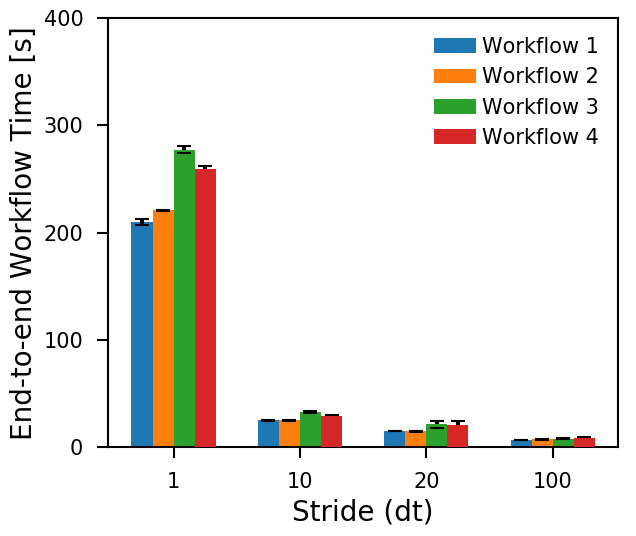

In [3]:
df_filtered = df[(df.L==15)&
                 (df.output_type=='dcd')]
df_sorted = df_filtered.sort_values('L', ascending=True)
for i,(L,df_L_grp) in enumerate(df_sorted.groupby('L')):
    for i,(job_type,df_job_type_grp) in enumerate(df_L_grp.groupby('workflow_type')):
        dump_intervals = []
        a_times = []
        a_times_sem = []
        for j,(ddi,df_grp) in enumerate(df_job_type_grp.groupby('data_dump_interval')):
            if (job_type=='traditional'):
                a_times.append(df_grp.ete_workflow_time_s.mean())
                a_times_sem.append(df_grp.ete_workflow_time_s.sem())
            else:
                a_times.append(df_grp.ete_workflow_time_s.mean())
                a_times_sem.append(df_grp.ete_workflow_time_s.sem())
            dump_intervals.append(ddi)
            #print(a_times_sem)
        bar_width=100
        spacing = bar_width*6 # times the barwidth
        xvals = (np.arange(len(dump_intervals))+1)*(spacing)
        #print(xvals)
        if job_type=='Workflow 1':
            line_style='--'
            xvalues = xvals-1.5*bar_width
            legend = 'Workflow 1'
            #print(xvalues)
        elif job_type=='Workflow 2':
            line_style='-'
            xvalues = xvals-bar_width/2
            legend = 'Workflow 2'
        elif job_type=='Workflow 3':
            line_style='-'
            xvalues = xvals+bar_width/2
            legend = 'Workflow 3'
        elif job_type=='Workflow 4':
            line_style='-'
            xvalues = xvals+1.5*bar_width
            legend = 'Workflow 4'
            #print(xvalues)
        plt.bar(xvalues,
                a_times,
                yerr=a_times_sem,
                zorder=i,
                align='center', alpha=1, ecolor='black', capsize=5, width=bar_width,
                label=legend)#'{} (L: {})'.format(str.title(job_type.replace('_',' ')),L))
        plt.xticks(xvals,dump_intervals, fontsize=15)
        plt.yticks(fontsize=15)

plt.legend(fontsize=15)
plt.tight_layout()
plt.ylim(0,400)
#plt.xlim(np.min(xvals)-100,np.max(xvals)+100)
plt.xlabel('Stride (dt)', fontsize=20)
plt.ylabel('End-to-end Workflow Time [s]', fontsize=20)

15
Workflow 1
Workflow 2
Workflow 3
Workflow 4


Text(17.194444444444443, 0.5, 'End-to-end Workflow Time [s]')

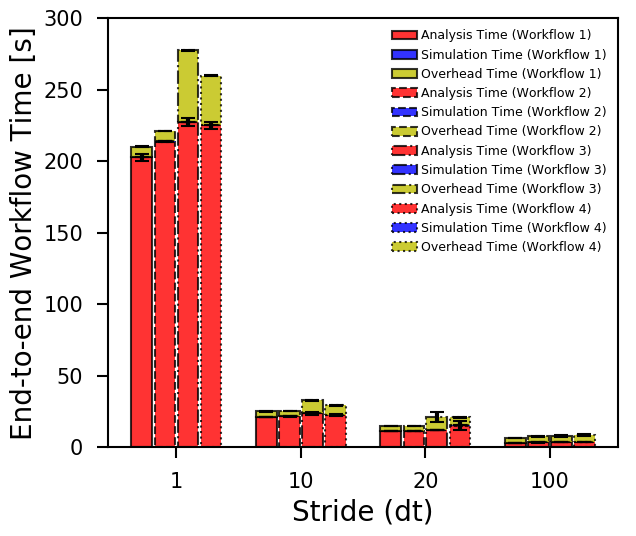

In [4]:
df_filtered = df[(df.L==15)&
                 (df.output_type=='dcd')]
df_sorted = df_filtered.sort_values('L', ascending=True)
for i,(L,df_L_grp) in enumerate(df_sorted.groupby('L')):
    print(L)
    for i,(job_type,df_job_type_grp) in enumerate(df_L_grp.groupby('workflow_type')):
        print(job_type)
        dump_intervals = []
        s_times = []
        a_times = []
        t_times = []
        a_times_sem = []
        s_times_sem = []
        t_times_sem = []
        for j,(ddi,df_grp) in enumerate(df_job_type_grp.groupby('data_dump_interval')):
            a_times.append(df_grp.analysis_time_s.mean())
            s_times.append(df_grp.simulation_time_s.mean())
            t_times.append(df_grp.overhead_time_s.mean())
            a_times_sem.append(df_grp.analysis_time_s.sem())
            s_times_sem.append(df_grp.simulation_time_s.sem())
            t_times_sem.append(df_grp.overhead_time_s.sem())
            dump_intervals.append(ddi)
            #print(a_times_sem)
        
        total_time = np.asarray(a_times)+np.asarray(s_times)+np.asarray(t_times)
        bar_width=100
        spacing = bar_width*6 # times the barwidth
        xvals = (np.arange(len(dump_intervals))+1)*(spacing)
        #print(xvals)
        if job_type=='Workflow 1':
            line_style='-'
            xvalues = xvals-(1.5*bar_width)-(bar_width*0.17)
            legend = 'Workflow 1'
            #print(xvalues)
        elif job_type=='Workflow 2':
            line_style='--'
            xvalues = xvals-(bar_width/2)-(bar_width*0.05)
            legend = 'Workflow 2'
        elif job_type=='Workflow 3':
            line_style='-.'
            xvalues = xvals+(bar_width/2)+(bar_width*0.05)
            legend = 'Workflow 3'
        elif job_type=='Workflow 4':
            line_style=':'
            xvalues = xvals+(1.5*bar_width)+(bar_width*0.17)
            legend = 'Workflow 4'
            #print(xvalues)
        
        
        #print('p0 get label',p0[0],p0[1],p0[2],p0[3],p0[4],p0[5])
            
        p1 = plt.bar(xvalues,
                    a_times,
                    yerr=a_times_sem,
                    color='r',
                     ls=line_style,
                     edgecolor='k',
                     lw=1.5,
                    #zorder=0,
                    align='center', alpha=0.8, ecolor='black', capsize=5, width=bar_width,
                    label='{} ({})'.format('Analysis Time',str.title(legend)))#job_type.replace('_',' '))))
        
        p2 = plt.bar(xvalues,
                    s_times,
                    yerr=s_times_sem,
                    bottom=a_times,
                    color='b',
                     ls=line_style,
                     edgecolor='k',
                     lw=1.5,
                    #zorder=0,
                    align='center', alpha=0.8, ecolor='k', capsize=5, width=bar_width,
                    label='{} ({})'.format('Simulation Time',str.title(legend)))#job_type.replace('_',' '))))
        
        p3 = plt.bar(xvalues,
                    t_times,
                    yerr=t_times_sem,
                    bottom=np.asarray(a_times)+np.asarray(s_times),
                    color='y',
                     ls=line_style,
                     edgecolor='k',
                     lw=1.5,
                    #zorder=0,
                    align='center', alpha=0.8, ecolor='black', capsize=5, width=bar_width,
                    label='{} ({})'.format('Overhead Time',str.title(legend)))#job_type.replace('_',' '))))
        
        plt.xticks(xvals,dump_intervals, fontsize=15)
        plt.yticks(fontsize=15)

#plt.legend((p1[0], p2[0], p3[0]), ('Analysis Time', 'Simulation Time', 'Transfer Time'),fontsize=15)
plt.legend(fontsize=9,ncol=1)
plt.tight_layout()
plt.ylim(0,300)
#plt.xlim(np.min(xvals)-100,np.max(xvals)+100)
plt.xlabel('Stride (dt)', fontsize=20)
plt.ylabel('End-to-end Workflow Time [s]', fontsize=20)

Text(10.569444444444445, 0.5, 'Simulation Time [s]')

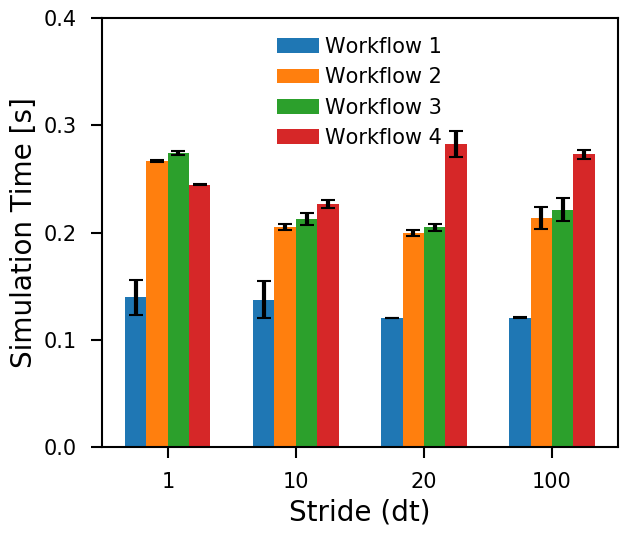

In [5]:
df_filtered = df[(df.L==15)&
                 (df.output_type=='dcd')]
df_sorted = df_filtered.sort_values('L', ascending=True)
for i,(L,df_L_grp) in enumerate(df_sorted.groupby('L')):
    for i,(job_type,df_job_type_grp) in enumerate(df_L_grp.groupby('workflow_type')):
        dump_intervals = []
        a_times = []
        a_times_sem = []
        for j,(ddi,df_grp) in enumerate(df_job_type_grp.groupby('data_dump_interval')):
            if (job_type=='traditional'):
                a_times.append(df_grp.simulation_time_s.mean())
                a_times_sem.append(df_grp.simulation_time_s.sem())
            else:
                a_times.append(df_grp.simulation_time_s.mean())
                a_times_sem.append(df_grp.simulation_time_s.sem())
            dump_intervals.append(ddi)
            #print(a_times_sem)
        bar_width=100
        spacing = bar_width*6 # times the barwidth
        xvals = (np.arange(len(dump_intervals))+1)*(spacing)
        #print(xvals)
        if job_type=='Workflow 1':
            line_style='--'
            xvalues = xvals-1.5*bar_width
            legend = 'Workflow 1'
            #print(xvalues)
        elif job_type=='Workflow 2':
            line_style='-'
            xvalues = xvals-bar_width/2
            legend = 'Workflow 2'
        elif job_type=='Workflow 3':
            line_style='-'
            xvalues = xvals+bar_width/2
            legend = 'Workflow 3'
        elif job_type=='Workflow 4':
            line_style='-'
            xvalues = xvals+1.5*bar_width
            legend = 'Workflow 4'
            #print(xvalues)
        plt.bar(xvalues,
                a_times,
                yerr=a_times_sem,
                #zorder=i,
                align='center', alpha=1, ecolor='black', capsize=5, width=bar_width,
                label=legend)#'{} (L: {})'.format(str.title(job_type.replace('_',' ')),L))
        plt.xticks(xvals,dump_intervals, fontsize=15)
        plt.yticks(fontsize=15)

plt.legend(fontsize=15)
plt.tight_layout()
plt.ylim(0,0.4)
#plt.xlim(np.min(xvals)-100,np.max(xvals)+100)
plt.xlabel('Stride (dt)', fontsize=20)
plt.ylabel('Simulation Time [s]', fontsize=20)

Text(17.194444444444443, 0.5, 'Analysis Time [s]')

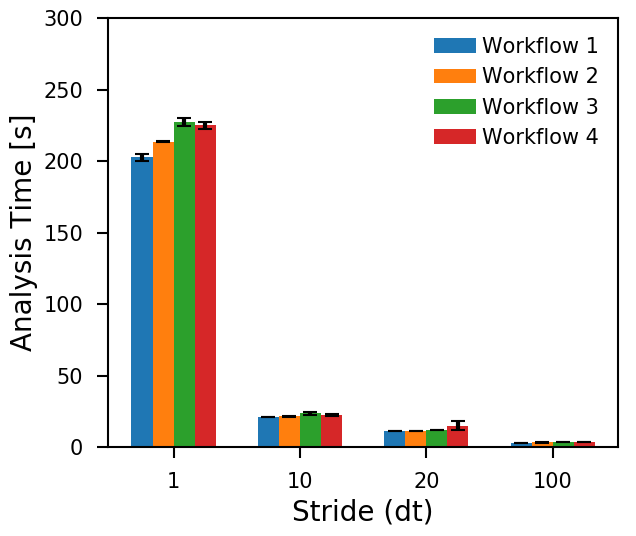

In [6]:
df_filtered = df[(df.L==15)&
                 (df.output_type=='dcd')]
df_sorted = df_filtered.sort_values('L', ascending=True)
for i,(L,df_L_grp) in enumerate(df_sorted.groupby('L')):
    for i,(job_type,df_job_type_grp) in enumerate(df_L_grp.groupby('workflow_type')):
        dump_intervals = []
        a_times = []
        a_times_sem = []
        for j,(ddi,df_grp) in enumerate(df_job_type_grp.groupby('data_dump_interval')):
            if (job_type=='traditional'):
                a_times.append(df_grp.analysis_time_s.mean())
                a_times_sem.append(df_grp.analysis_time_s.sem())
            else:
                a_times.append(df_grp.analysis_time_s.mean())
                a_times_sem.append(df_grp.analysis_time_s.sem())
            dump_intervals.append(ddi)
            #print(a_times_sem)
        bar_width=100
        spacing = bar_width*6 # times the barwidth
        xvals = (np.arange(len(dump_intervals))+1)*(spacing)
        #print(xvals)
        if job_type=='Workflow 1':
            line_style='--'
            xvalues = xvals-1.5*bar_width
            legend = 'Workflow 1'
            #print(xvalues)
        elif job_type=='Workflow 2':
            line_style='-'
            xvalues = xvals-bar_width/2
            legend = 'Workflow 2'
        elif job_type=='Workflow 3':
            line_style='-'
            xvalues = xvals+bar_width/2
            legend = 'Workflow 3'
        elif job_type=='Workflow 4':
            line_style='-'
            xvalues = xvals+1.5*bar_width
            legend = 'Workflow 4'
            #print(xvalues)
        plt.bar(xvalues,
                a_times,
                yerr=a_times_sem,
                #zorder=i,
                align='center', alpha=1, ecolor='black', capsize=5, width=bar_width,
                label=legend)#'{} (L: {})'.format(str.title(job_type.replace('_',' ')),L))
        plt.xticks(xvals,dump_intervals, fontsize=15)
        plt.yticks(fontsize=15)

plt.legend(fontsize=15)
plt.tight_layout()
plt.ylim(0,300)
#plt.xlim(np.min(xvals)-100,np.max(xvals)+100)
plt.xlabel('Stride (dt)', fontsize=20)
plt.ylabel('Analysis Time [s]', fontsize=20)

Text(30.444444444444443, 0.5, 'Overhead Time [s]')

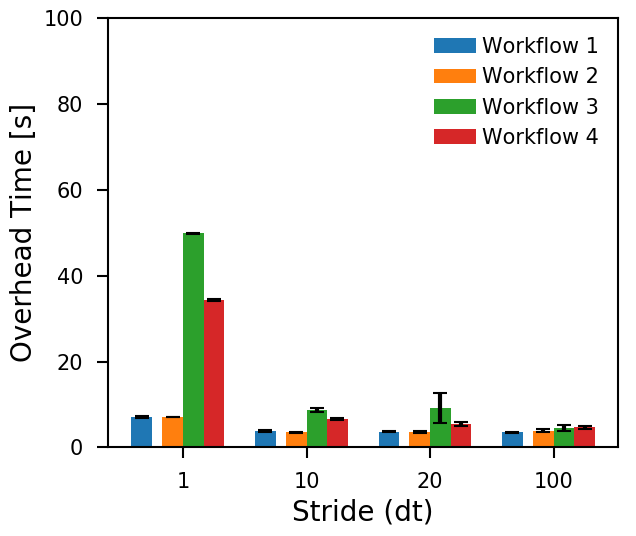

In [7]:
df_filtered = df[(df.L==15)&
                 (df.output_type=='dcd')]
df_sorted = df_filtered.sort_values('L', ascending=True)
for i,(L,df_L_grp) in enumerate(df_sorted.groupby('L')):
    for i,(job_type,df_job_type_grp) in enumerate(df_L_grp.groupby('workflow_type')):
        dump_intervals = []
        a_times = []
        a_times_sem = []
        for j,(ddi,df_grp) in enumerate(df_job_type_grp.groupby('data_dump_interval')):
            if (job_type=='traditional'):
                a_times.append(df_grp.overhead_time_s.mean())
                a_times_sem.append(df_grp.overhead_time_s.sem())
            else:
                a_times.append(df_grp.overhead_time_s.mean())
                a_times_sem.append(df_grp.overhead_time_s.sem())
            dump_intervals.append(ddi)
            #print(a_times_sem)
        bar_width=100
        spacing = bar_width*6 # times the barwidth
        xvals = (np.arange(len(dump_intervals))+1)*(spacing)
        #print(xvals)
        if job_type=='Workflow 1':
            line_style='--'
            xvalues = xvals-2*bar_width
            legend = 'Workflow 1'
            #print(xvalues)
        elif job_type=='Workflow 2':
            line_style='-'
            xvalues = xvals-bar_width/2
            legend = 'Workflow 2'
        elif job_type=='Workflow 3':
            line_style='-'
            xvalues = xvals+bar_width/2
            legend = 'Workflow 3'
        elif job_type=='Workflow 4':
            line_style='-'
            xvalues = xvals+1.5*bar_width
            legend = 'Workflow 4'
            #print(xvalues)
        plt.bar(xvalues,
                a_times,
                yerr=a_times_sem,
                #zorder=i,
                align='center', alpha=1, ecolor='black', capsize=5, width=bar_width,
                label=legend)#'{} (L: {})'.format(str.title(job_type.replace('_',' ')),L))
        plt.xticks(xvals,dump_intervals, fontsize=15)
        plt.yticks(fontsize=15)

plt.legend(fontsize=15)
plt.tight_layout()
plt.ylim(0,100)
#plt.xlim(np.min(xvals)-100,np.max(xvals)+100)
plt.xlabel('Stride (dt)', fontsize=20)
plt.ylabel('Overhead Time [s]', fontsize=20)